<hr style="border: double 5px;">

# 서울시 구별 CCTV 현황 분석하기
* 서울시 구별 CCTV 수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위비교
* 인구대비 CCTV의 평균치를 확인하고, CCTV가 과하거나 부족한 구를 확인한다.

<hr style="border: double 2px;">

## 파일 읽어오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
#cctv_df = pd.read_csv('data/01. CCTV_in_Seoul.csv', encoding = 'utf-8', index_col='기관명')
cctv_df = pd.read_csv('data/01. CCTV_in_Seoul.csv', encoding = 'utf-8')

In [5]:
pop_df = pd.read_excel('data/01. population_in_Seoul.xls', header=2, usecols='B,D,G,J,N', encoding='utf-8')

## 읽어 온 데이터 확인

In [6]:
cctv_df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [7]:
cctv_df.describe()

,소계,2013년도 이전,2014년,2015년,2016년
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1179.080000,764.760000,159.480000,205.200000,385.880000
std,556.728983,415.510257,104.132976,137.877059,182.479981
min,485.000000,238.000000,21.000000,30.000000,81.000000
25%,748.000000,464.000000,78.000000,103.000000,292.000000
50%,1015.000000,573.000000,142.000000,184.000000,377.000000
75%,1496.000000,1070.000000,218.000000,269.000000,467.000000
max,2780.000000,1843.000000,430.000000,584.000000,932.000000


In [8]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
기관명          25 non-null object
소계           25 non-null int64
2013년도 이전    25 non-null int64
2014년        25 non-null int64
2015년        25 non-null int64
2016년        25 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [9]:
cctv_df.shape

(25, 6)

In [10]:
cctv_df.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [11]:
len(cctv_df.columns) # 칼럼 갯수

6

In [12]:
cctv_df.columns[0]

'기관명'

In [13]:
pop_df.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


<hr style="border: double 2px;">

## 데이터 열 정제

In [14]:
#cctv_df.index.name = '구별'
cctv_df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [15]:
cctv_df.rename(columns={cctv_df.columns[0]:'구별'}, inplace=True)

In [16]:
cctv_df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 열 이름 변경

In [17]:
pop_df.rename(columns={pop_df.columns[0]:'구별', pop_df.columns[1]:'인구수', pop_df.columns[2]:'한국인', pop_df.columns[3]:'외국인', pop_df.columns[4]:'고령자'}, inplace=True)
pop_df.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [18]:
pop_df.rename(columns={'자치구':'구별', '계':'인구수', '계.1':'한국인', '계.2':'외국인', '65세이상고령자':'고령자'}, inplace=True)
pop_df.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [19]:
pop_df.columns=['구별','인구수','한국인','외국인','고령자']
pop_df.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 열 이름 확인

In [20]:
pop_df.loc[:,'구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [21]:
cctv_df.loc[:,'구별'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

<hr style="border: double 2px;">

## 행 삭제

In [22]:
pop_df[pop_df['구별'].isnull()] # null 확인

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [23]:
pop_df.drop([0], inplace=True)

In [24]:
pop_df.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [25]:
pop_df.drop([len(pop_df.index)], inplace=True)
pop_df.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [26]:
pop_df.dropna(inplace=True) # null인 값 다 삭제

In [27]:
pop_df.dropna(how='all', inplace=True) 
# how='any' : 하나라도 null이면 삭제
# how='all' : 모든 칼럼이 null이면 삭제
# thresh = 3 : null이 3개이상이면 삭제
# subset = ? : 해당 칼럼이 null이면 삭제 .. pop_df.dropna(subset=['구별', , , ], inplace=True)


In [28]:
pop_df.shape

(25, 5)

<hr style="border: double 2px;">

## 행 검색

In [29]:
cctv_df[cctv_df.iloc[:,1].min() == cctv_df['소계']] # 가장 작은 값

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386


In [30]:
cctv_df.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [31]:
cctv_df['최근증가율'] = ((cctv_df['2014년']+cctv_df['2015년']+cctv_df['2016년'])/cctv_df['2013년도 이전'])*100 # 열 추가

In [32]:
cctv_df

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


In [33]:
cctv_df.sort_values(by='2013년도 이전', ascending=True).head(5) # 오름차순 정렬

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
2,강북구,748,369,120,138,204,125.203252
1,강동구,773,379,99,155,377,166.490765
3,강서구,884,388,258,184,81,134.793814


In [34]:
pop_df.head(10)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [35]:
pop_df['외국인비율'] = pop_df['외국인']/pop_df['인구수'] * 100
pop_df['고령자비율'] = pop_df['고령자']/pop_df['인구수'] * 100

In [36]:
pop_df.head(10)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322
7,중랑구,414503.0,409882.0,4621.0,56774.0,1.114829,13.696885
8,성북구,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
10,도봉구,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [37]:
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:.2f}'.format

In [38]:
pop_df.head(10)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.00,153589.00,9231.00,25425.00,5.67,15.62
2,중구,133240.00,124312.00,8928.00,20764.00,6.70,15.58
3,용산구,244203.00,229456.00,14747.00,36231.00,6.04,14.84
4,성동구,311244.00,303380.00,7864.00,39997.00,2.53,12.85
5,광진구,372164.00,357211.00,14953.00,42214.00,4.02,11.34
6,동대문구,369496.00,354079.00,15417.00,54173.00,4.17,14.66
7,중랑구,414503.00,409882.00,4621.00,56774.00,1.11,13.70
8,성북구,461260.00,449773.00,11487.00,64692.00,2.49,14.03
9,강북구,330192.00,326686.00,3506.00,54813.00,1.06,16.60
10,도봉구,348646.00,346629.00,2017.00,51312.00,0.58,14.72


In [39]:
pop_df.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.00,660584.00,6899.00,72506.00,1.03,10.86
16,강서구,603772.00,597248.00,6524.00,72548.00,1.08,12.02
23,강남구,570500.00,565550.00,4950.00,63167.00,0.87,11.07
11,노원구,569384.00,565565.00,3819.00,71941.00,0.67,12.63
21,관악구,525515.00,507203.00,18312.00,68082.00,3.48,12.96


In [40]:
pop_df.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.00,368072.00,34913.00,52413.00,8.66,13.01
17,구로구,447874.00,416487.00,31387.00,56833.00,7.01,12.69
18,금천구,255082.00,236353.00,18729.00,32970.00,7.34,12.93
21,관악구,525515.00,507203.00,18312.00,68082.00,3.48,12.96
6,동대문구,369496.00,354079.00,15417.00,54173.00,4.17,14.66


In [41]:
pop_df.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.00,368072.00,34913.00,52413.00,8.66,13.01
18,금천구,255082.00,236353.00,18729.00,32970.00,7.34,12.93
17,구로구,447874.00,416487.00,31387.00,56833.00,7.01,12.69
2,중구,133240.00,124312.00,8928.00,20764.00,6.70,15.58
3,용산구,244203.00,229456.00,14747.00,36231.00,6.04,14.84


In [42]:
pop_df.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.00,326686.00,3506.00,54813.00,1.06,16.60
1,종로구,162820.00,153589.00,9231.00,25425.00,5.67,15.62
2,중구,133240.00,124312.00,8928.00,20764.00,6.70,15.58
3,용산구,244203.00,229456.00,14747.00,36231.00,6.04,14.84
13,서대문구,327163.00,314982.00,12181.00,48161.00,3.72,14.72


<hr style="border: double 2px;">

# CCTV와 인구 데이터를 합쳐서 분석하기

In [43]:
cctv_df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.62
1,강동구,773,379,99,155,377,166.49
2,강북구,748,369,120,138,204,125.20
3,강서구,884,388,258,184,81,134.79
4,관악구,1496,846,260,390,613,149.29


In [44]:
pop_df.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.00,153589.00,9231.00,25425.00,5.67,15.62
2,중구,133240.00,124312.00,8928.00,20764.00,6.70,15.58
3,용산구,244203.00,229456.00,14747.00,36231.00,6.04,14.84
4,성동구,311244.00,303380.00,7864.00,39997.00,2.53,12.85
5,광진구,372164.00,357211.00,14953.00,42214.00,4.02,11.34


In [45]:
cctvpop_df = cctv_df.merge(pop_df)

In [46]:
cctvpop_df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07
1,강동구,773,379,99,155,377,166.49,453233.00,449019.00,4214.00,54622.00,0.93,12.05
2,강북구,748,369,120,138,204,125.20,330192.00,326686.00,3506.00,54813.00,1.06,16.60
3,강서구,884,388,258,184,81,134.79,603772.00,597248.00,6524.00,72548.00,1.08,12.02
4,관악구,1496,846,260,390,613,149.29,525515.00,507203.00,18312.00,68082.00,3.48,12.96


## 열 삭제

In [47]:
cctvpop_df.drop(['2014년','2015년','2016년'], inplace=True, axis=1)

In [48]:
cctvpop_df

,구별,소계,2013년도 이전,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07
1,강동구,773,379,166.49,453233.00,449019.00,4214.00,54622.00,0.93,12.05
2,강북구,748,369,125.20,330192.00,326686.00,3506.00,54813.00,1.06,16.60
3,강서구,884,388,134.79,603772.00,597248.00,6524.00,72548.00,1.08,12.02
4,관악구,1496,846,149.29,525515.00,507203.00,18312.00,68082.00,3.48,12.96
5,광진구,707,573,53.23,372164.00,357211.00,14953.00,42214.00,4.02,11.34
6,구로구,1561,1142,64.97,447874.00,416487.00,31387.00,56833.00,7.01,12.69
7,금천구,1015,674,100.00,255082.00,236353.00,18729.00,32970.00,7.34,12.93
8,노원구,1265,542,188.93,569384.00,565565.00,3819.00,71941.00,0.67,12.63
9,도봉구,485,238,246.64,348646.00,346629.00,2017.00,51312.00,0.58,14.72


In [49]:
del cctvpop_df['2013년도 이전']

In [50]:
cctvpop_df

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07
1,강동구,773,166.49,453233.00,449019.00,4214.00,54622.00,0.93,12.05
2,강북구,748,125.20,330192.00,326686.00,3506.00,54813.00,1.06,16.60
3,강서구,884,134.79,603772.00,597248.00,6524.00,72548.00,1.08,12.02
4,관악구,1496,149.29,525515.00,507203.00,18312.00,68082.00,3.48,12.96
5,광진구,707,53.23,372164.00,357211.00,14953.00,42214.00,4.02,11.34
6,구로구,1561,64.97,447874.00,416487.00,31387.00,56833.00,7.01,12.69
7,금천구,1015,100.00,255082.00,236353.00,18729.00,32970.00,7.34,12.93
8,노원구,1265,188.93,569384.00,565565.00,3819.00,71941.00,0.67,12.63
9,도봉구,485,246.64,348646.00,346629.00,2017.00,51312.00,0.58,14.72


## 인덱스 설정

In [51]:
cctvpop_df.set_index('구별', inplace=True)
#cctvpop_df.index=cctvpop_df['구별']

<hr style="border: double 2px;">

## CCTV와 상관계수 계산하기

* 고령자비율, 외국인비율, 인구수 중에서 CCTV와 상관계수의 값을 조사

* 상관계수 : -1~ 1
* 절대값 0        : 관계 없음
* 절대값 0.1이하  : 거의 무시
* 절대값 0.3이하  : 약간 상관관계
* 절대값 0.7이하  : 아주 밀접한 상관관계

* 양의 상관관계 음의 상관관계..? : 절대값이 크면 클수록 상관관계가 있음

## 넘파이 상관관계 

In [52]:
cctvpop_df.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07
강동구,773,166.49,453233.00,449019.00,4214.00,54622.00,0.93,12.05
강북구,748,125.20,330192.00,326686.00,3506.00,54813.00,1.06,16.60
강서구,884,134.79,603772.00,597248.00,6524.00,72548.00,1.08,12.02
관악구,1496,149.29,525515.00,507203.00,18312.00,68082.00,3.48,12.96
광진구,707,53.23,372164.00,357211.00,14953.00,42214.00,4.02,11.34
구로구,1561,64.97,447874.00,416487.00,31387.00,56833.00,7.01,12.69
금천구,1015,100.00,255082.00,236353.00,18729.00,32970.00,7.34,12.93
노원구,1265,188.93,569384.00,565565.00,3819.00,71941.00,0.67,12.63


In [53]:
print(np.corrcoef(cctvpop_df['인구수'], cctvpop_df['소계']))
print(np.corrcoef(cctvpop_df['외국인'], cctvpop_df['고령자']))
print(np.corrcoef(cctvpop_df['외국인'], cctvpop_df['소계']))
print(np.corrcoef(cctvpop_df['고령자'], cctvpop_df['소계']))
print(np.corrcoef(cctvpop_df['한국인'], cctvpop_df['소계']))
print(np.corrcoef(cctvpop_df['소계'], cctvpop_df['소계']))

[[1.    0.306]
 [0.306 1.   ]]
[[ 1.    -0.155]
 [-0.155  1.   ]]
[[ 1.    -0.024]
 [-0.024  1.   ]]
[[1.    0.255]
 [0.255 1.   ]]
[[1.    0.304]
 [0.304 1.   ]]
[[1. 1.]
 [1. 1.]]


## 판다스 상관관계

In [54]:
cctvpop_df.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.00,-0.34,0.31,0.30,-0.02,0.26,-0.14,-0.28
최근증가율,-0.34,1.00,-0.09,-0.08,-0.15,-0.07,-0.04,0.19
인구수,0.31,-0.09,1.00,1.00,-0.15,0.93,-0.59,-0.67
한국인,0.30,-0.08,1.00,1.00,-0.21,0.93,-0.64,-0.66
외국인,-0.02,-0.15,-0.15,-0.21,1.00,-0.16,0.84,-0.01
고령자,0.26,-0.07,0.93,0.93,-0.16,1.00,-0.61,-0.38
외국인비율,-0.14,-0.04,-0.59,-0.64,0.84,-0.61,1.00,0.27
고령자비율,-0.28,0.19,-0.67,-0.66,-0.01,-0.38,0.27,1.00


<hr style="border: double 2px;">

## 시각화

In [55]:
import matplotlib.pyplot as plt
# 매직 커멘드 : 해당 파일에 그래프를 그려라 (inline)
%matplotlib inline 

# 마이너스 기호가 깨지는 현상 방지
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 지원하게하기
f_path = "C:/Windows/Fonts/malgun.ttf" 
# f_path = "/Libary/Fonts/AppliGothic.ttf"
font_name = font_manager.FontProperties(fname = f_path).get_name() 
rc('font', family=font_name)

In [59]:
df = cctvpop_df
df.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07
강동구,773,166.49,453233.00,449019.00,4214.00,54622.00,0.93,12.05
강북구,748,125.20,330192.00,326686.00,3506.00,54813.00,1.06,16.60
강서구,884,134.79,603772.00,597248.00,6524.00,72548.00,1.08,12.02
관악구,1496,149.29,525515.00,507203.00,18312.00,68082.00,3.48,12.96


## 인구수 확인

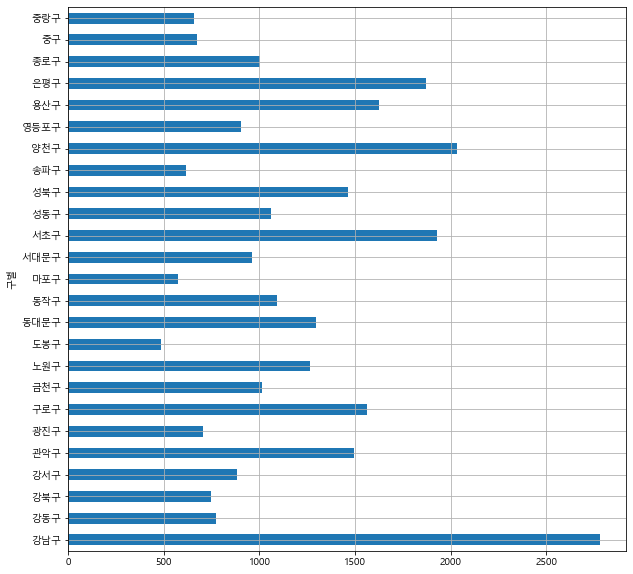

In [62]:
plt.figure()
df['소계'].plot(kind='barh', grid=True, figsize=(10,10)) # kind=barh(횡으로 그리기), grid = 그리드
plt.show()

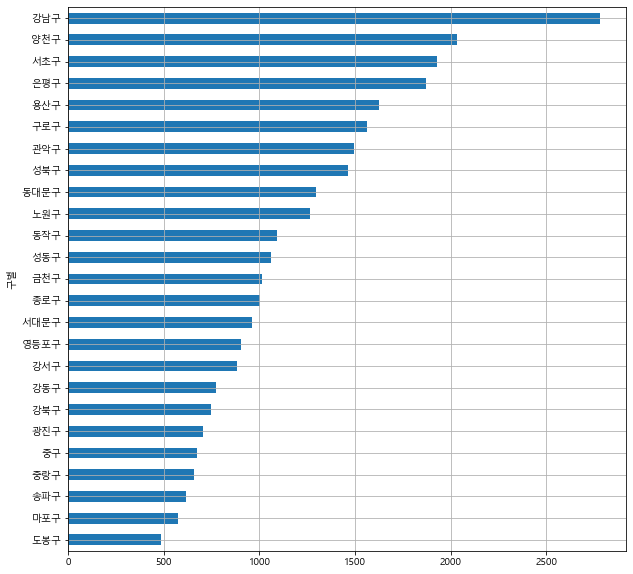

In [63]:
df['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

## 비율확인

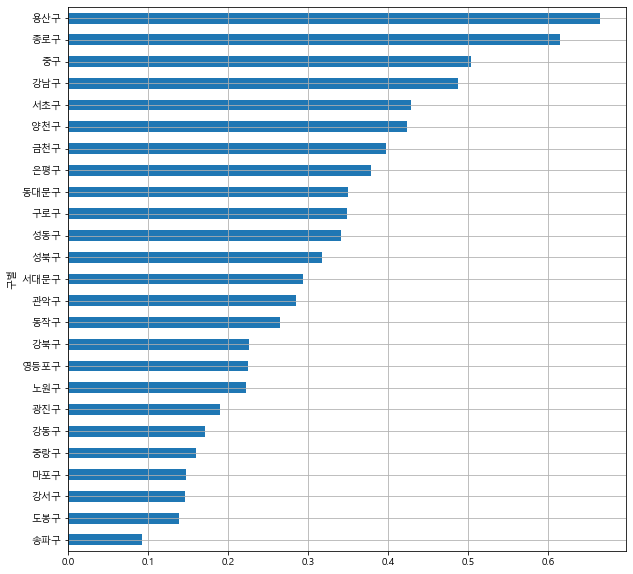

In [65]:
df['CCTV비율'] = df['소계']/df['인구수'] * 100
df['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

## 분포도

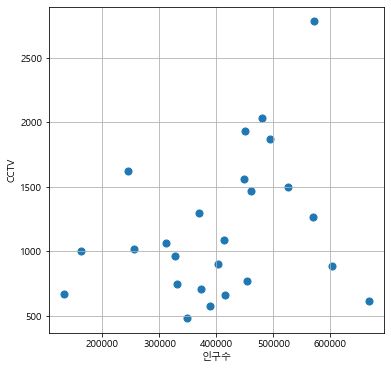

In [66]:
plt.figure(figsize=(6,6))
plt.scatter(df['인구수'], df['소계'], s=50) # x, y로 점을 찍는다

plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()
plt.show()

## 인구당 평균 CCTV의 수 기준선 ( 기울기 )

In [70]:
fp1 = np.polyfit(df['인구수'], df['소계'], 1) # x, y, 1(1차방정식) # 1차 방정식 기울기
fp1

array([1.309e-03, 6.451e+02])

In [71]:
f1 = np.poly1d(fp1) # 1차 방정식의 Y절편값 구하는 함수 , 2차? : poly2d
fx = np.linspace(100000, 700000, 100) # x좌표 구하기 # min, max

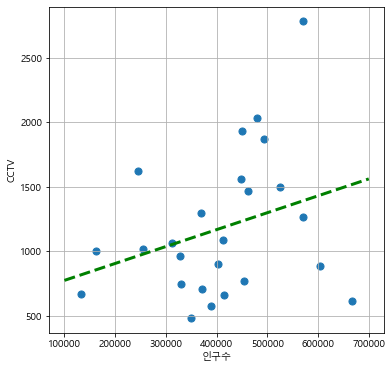

In [72]:
plt.figure(figsize=(6,6))
plt.scatter(df['인구수'], df['소계'], s=50) # x, y로 점을 찍는다
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') # x, y절편, ls=라인스타일, lw=라인두께, color=색

plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.grid()
plt.show()

## 오차구하기

In [73]:
df.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,2780,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07,0.49
강동구,773,166.49,453233.00,449019.00,4214.00,54622.00,0.93,12.05,0.17
강북구,748,125.20,330192.00,326686.00,3506.00,54813.00,1.06,16.60,0.23
강서구,884,134.79,603772.00,597248.00,6524.00,72548.00,1.08,12.02,0.15
관악구,1496,149.29,525515.00,507203.00,18312.00,68082.00,3.48,12.96,0.28


In [74]:
fp1 = np.polyfit(df['인구수'], df['소계'], 1) # 1차 방정식 기울기
f1 = np.poly1d(fp1) # Y절편값
fx = np.linspace(100000, 700000, 100) # x좌표 

df['오차'] = np.abs(df['소계'] - f1(df['인구수'])) # f1(df['인구수']) : 기준선에 알맞은 y값
df.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07,0.49,1388.06
강동구,773,166.49,453233.00,449019.00,4214.00,54622.00,0.93,12.05,0.17,465.42
강북구,748,125.20,330192.00,326686.00,3506.00,54813.00,1.06,16.60,0.23,329.34
강서구,884,134.79,603772.00,597248.00,6524.00,72548.00,1.08,12.02,0.15,551.50
관악구,1496,149.29,525515.00,507203.00,18312.00,68082.00,3.48,12.96,0.28,162.95


In [78]:
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.62,570500.00,565550.00,4950.00,63167.00,0.87,11.07,0.49,1388.06
송파구,618,104.35,667483.00,660584.00,6899.00,72506.00,1.03,10.86,0.09,900.91
양천구,2034,34.67,479978.00,475949.00,4029.00,52975.00,0.84,11.04,0.42,760.56
서초구,1930,63.37,450310.00,445994.00,4316.00,51733.00,0.96,11.49,0.43,695.40
용산구,1624,53.22,244203.00,229456.00,14747.00,36231.00,6.04,14.84,0.67,659.23


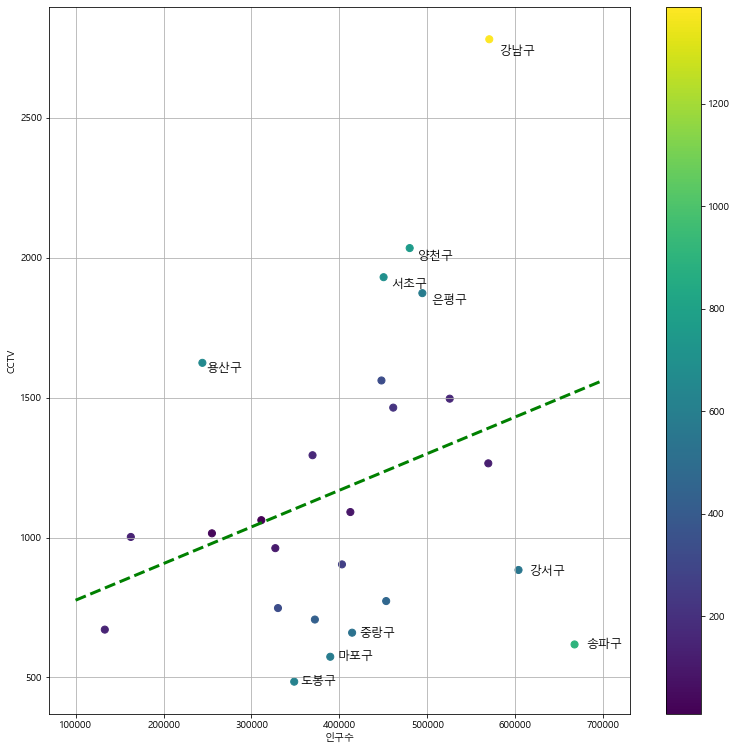

In [109]:
plt.figure(figsize=(13, 13))
plt.scatter(df['인구수'], df['소계'], s=50, c=df['오차']) # 오차 색상으로 설정
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') 

# index를 x, y에 찍기 
# 0~9
for n in range(10) :
     plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=12)



plt.xlabel('인구수')
plt.ylabel('CCTV')

plt.colorbar()

plt.grid()
plt.show()

## 지도그래프

In [6]:
# 아나콘다 프롬프트 관리자권한 실행
# conda install folium -c conda-forge
import folium

In [44]:
map1 = folium.Map(locaion=[37.51, 126.88], zoom_start=11)
map1

In [46]:
map2 = folium.Map(locaion=[37.51, 126.88], zoom_start=11, tiles='Stamen Toner')
map2

In [39]:
map3 = folium.Map(locaion=[37.51, 126.88], zoom_start=12)
folium.Marker([37.555, 126.99424], popup="Test Pop").add_to(map3)
folium.CircleMarker([37.555, 126.99424],radius=50, popup="Test Pop", color='#3186cc', fill_color='#3186cc').add_to(map3)
map3

In [47]:
import json
geo_path = './data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.05181987399999, 37.685815952999974],
      [127.05195432999994, 37.68295554600002],
      [127.05124372099999, 37.68200315500002],
      [127.050936224, 37.68010014399999],
      [127.04973706099997, 37.676724165999985],
      [127.04887969799995, 37.67518859900002],
      [127.04820611399998, 37.67048413200001],
      [127.04893704599999, 37.667590002],
      [127.05142672199997, 37.663973570999985],
      [127.051469816, 37.66042898699999],
      [127.05343323299996, 37.65751023399997],
      [127.054073077, 37.654496732999974],
      [127.05376492699997, 37.652060053000014],
      [127.05396756200003, 37.650582568],
      [127.05545541100003, 37.64824690299997],
      [127.05584227600002, 37.64705617300001],
      [127.05566746900001, 37.64460474399999],
      [127.05516606799995, 37.643454948],
      [127.05513914699998, 37.64133787499998],
      [127.0547437

<hr style='border:double 5px'>